In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-HR-Employee-Attrition.csv']


In [68]:
df = pd.read_csv("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [69]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [70]:
df.shape

(1470, 35)

In [71]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [72]:
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [73]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [74]:
df.drop(columns=["Department","EducationField","Education","EmployeeCount","BusinessTravel",\
                 "HourlyRate","Over18","MonthlyIncome","OverTime","StockOptionLevel","StandardHours"], inplace = True)

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

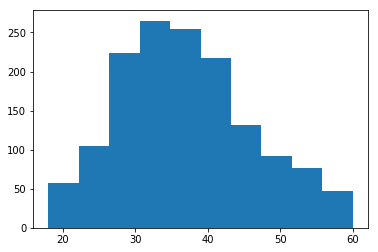

In [75]:
plt.hist(df.Age)

In [76]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,1,2,Female,3,2,Sales Executive,4,Single,19479,8,11,3,1,8,0,1,6,4,0,5
1,49,No,279,8,2,3,Male,2,2,Research Scientist,2,Married,24907,1,23,4,4,10,3,3,10,7,1,7
2,37,Yes,1373,2,4,4,Male,2,1,Laboratory Technician,3,Single,2396,6,15,3,2,7,3,3,0,0,0,0
3,33,No,1392,3,5,4,Female,3,1,Research Scientist,3,Married,23159,1,11,3,3,8,3,3,8,7,3,0
4,27,No,591,2,7,1,Male,3,1,Laboratory Technician,2,Married,16632,9,12,3,4,6,3,3,2,2,2,2


In [77]:
after_df = df.groupby(["Attrition","Gender","MaritalStatus"]).mean().reset_index().drop(columns = ["EmployeeNumber"])

In [78]:
after_df.sample(5)

,Attrition,Gender,MaritalStatus,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,No,Female,Single,37.065789,774.796053,8.565789,2.835526,2.750000,2.085526,2.927632,14958.631579,2.736842,14.967105,3.111842,2.953947,11.421053,2.907895,2.802632,6.901316,4.190789,2.217105,4.407895
9,Yes,Male,Divorced,36.708333,832.916667,11.000000,2.083333,2.541667,1.583333,2.541667,15110.541667,4.125000,14.958333,3.208333,2.750000,9.333333,2.333333,2.458333,3.416667,1.958333,1.208333,1.500000
10,Yes,Male,Married,34.603774,786.792453,9.981132,2.566038,2.509434,1.735849,2.471698,14412.377358,3.509434,14.264151,3.056604,2.622642,9.113208,2.886792,2.698113,5.471698,2.792453,2.471698,3.132075
3,No,Male,Divorced,37.419355,831.833333,9.225806,2.790323,2.784946,2.215054,2.822581,14225.908602,2.650538,15.021505,3.129032,2.774194,11.930108,2.811828,2.779570,7.645161,4.537634,2.016129,4.575269
5,No,Male,Single,36.196970,760.525253,8.257576,2.808081,2.732323,2.030303,2.863636,14641.585859,2.560606,15.166667,3.151515,2.782828,11.398990,2.909091,2.823232,7.116162,4.106061,1.868687,4.161616


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


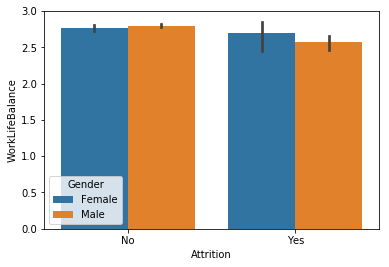

In [79]:
sns.barplot(x="Attrition", y = "WorkLifeBalance", hue = "Gender", data = after_df)

In [80]:
def plotmatrix(start,end):
    fig, axs = plt.subplots(nrows = 2, ncols=2)
    i = 0
    cols = after_df.columns[start:end]
    fig.set_size_inches(14, 10)
    for indi in range(2):
        for indj in range(2):
                sns.barplot(x="Attrition",y=str(cols[i]),data = after_df,ax = axs[indi][indj],hue = "MaritalStatus")\
                .set_title("affect of "+str(cols[i]))
                print("column : "+str(cols[i]))
                i+=1

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


column : Age
column : DailyRate
column : DistanceFromHome
column : EnvironmentSatisfaction


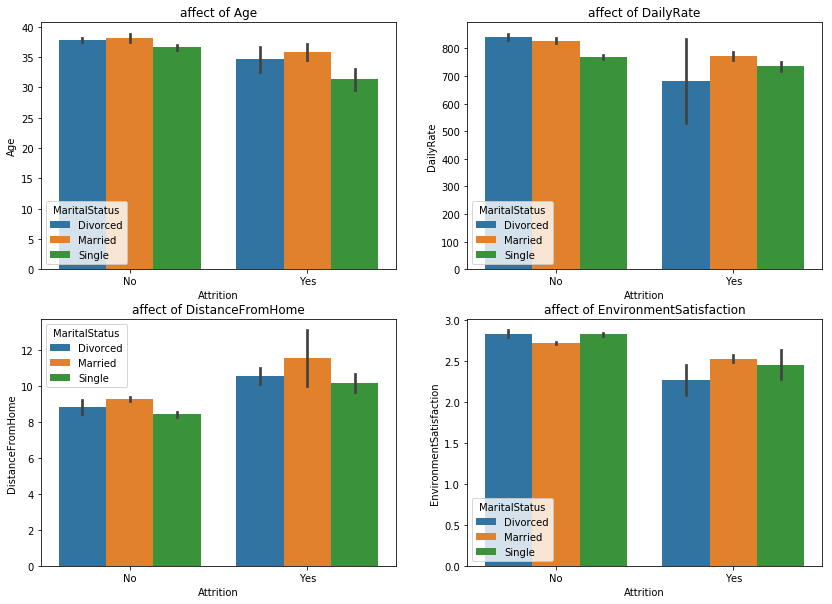

In [81]:
plotmatrix(3,7)

From the above figures, we can conclude that, 
1. Average Age of employees those who left the IBM is less compared to others.
2. Average Daily Rate of employees those who left the IBM is less compared to others.
3. Average Distance from Home of employees those who left the IBM is more compared to others.
4. Average Environment Satisfaction of employees those who left the IBM is less compared to others

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


column : JobLevel
column : JobSatisfaction
column : MonthlyRate
column : NumCompaniesWorked


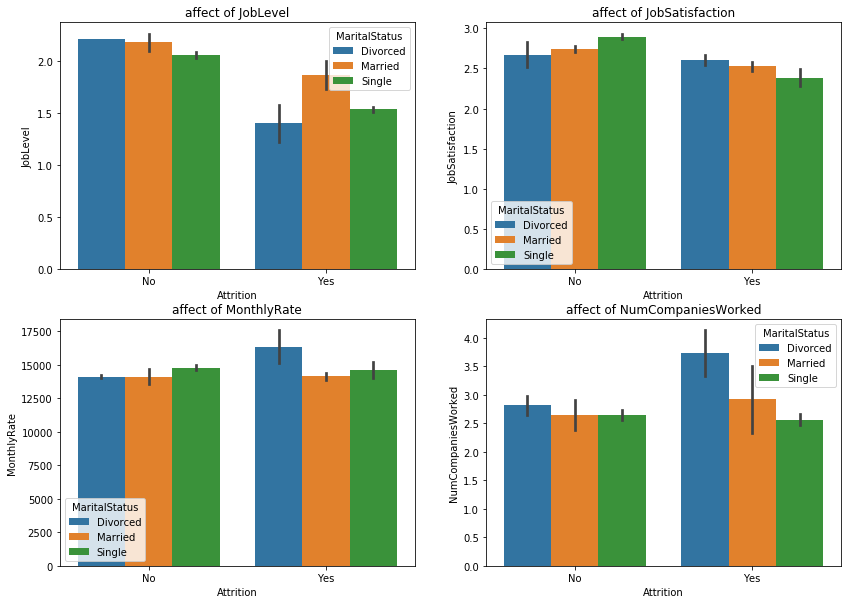

In [82]:
plotmatrix(8,12)

From the above figures, we can conclude that, 
1. Average Job Level of employees those who left the IBM is less compared to others.
2. Average Job Satisfaction of employees those who left the IBM is less compared to others.
3. seems like Monthly rate doesn't affect much for the attrition rate
4. Average No.of Companies worked by the employees those who left the IBM is more compared to others

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


column : PerformanceRating
column : RelationshipSatisfaction
column : TotalWorkingYears
column : TrainingTimesLastYear


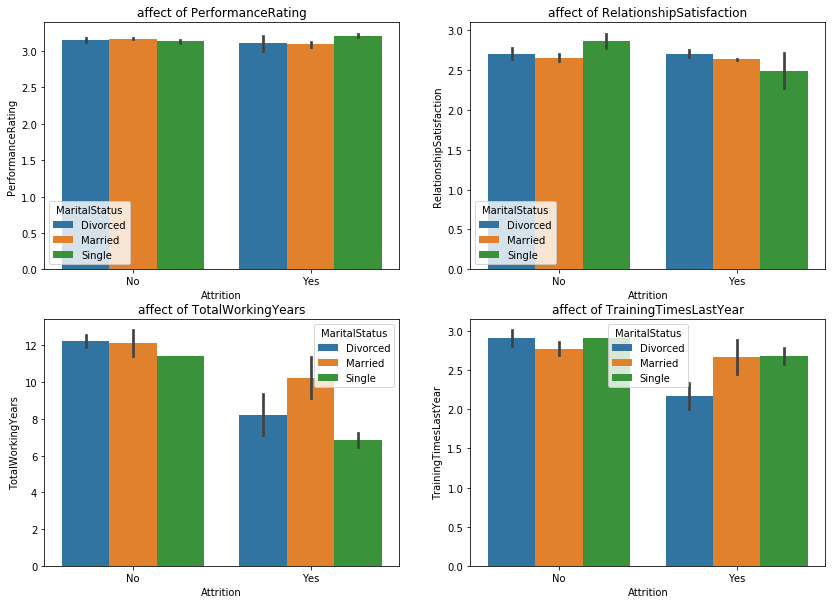

In [83]:
plotmatrix(13,17)

From the above figures, we can conclude that, 
1. Seems like only Total Working Years is affecting the attrition rate.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


column : YearsAtCompany
column : YearsInCurrentRole
column : YearsSinceLastPromotion
column : YearsWithCurrManager


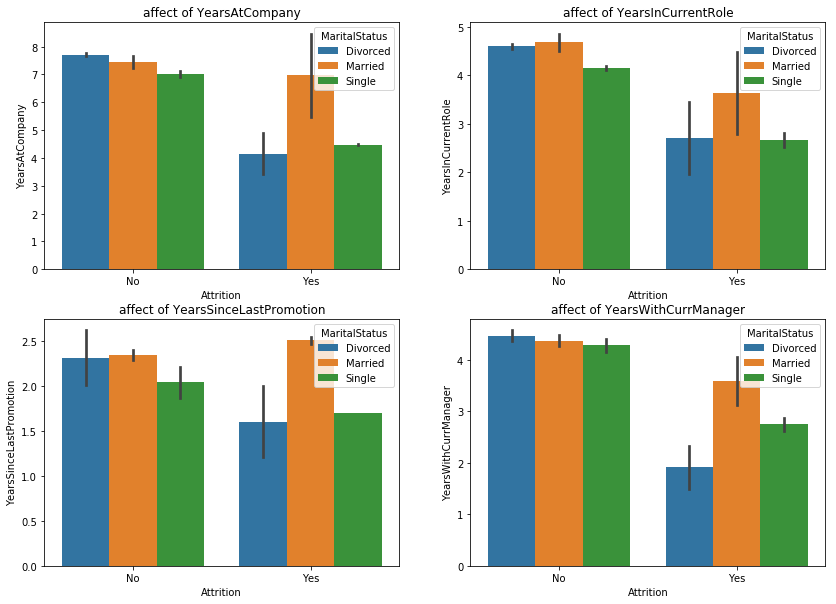

In [84]:
plotmatrix(18,22)

From the above figures, we can conclude that, 
1. Average years at IBM of those who left the IBM is less compared to others.
2. Average years in current Role at IBM of employees those who left the IBM is less compared to others.
3. Average years since LastPromotion at IBM of employees those who left the IBM is less compared to others.
4. Average years with Current Manager at IBM of employees those who left the IBM is less compared to others

(we have to build the model based on the selected features from the above analysis)(under editing*)

In [85]:
df["Gender"] = df.Gender.map({"Female" : 0, "Male" : 1})
df["MaritalStatus"] = df.MaritalStatus.map({"Divorced":0,"Married":1,"Single":2})

In [86]:
final_df = df[after_df.drop(columns=["MonthlyRate","PerformanceRating"]).columns]
final_df.head()
final_X = final_df.drop(columns=["Attrition"])
final_Y = final_df["Attrition"]

In [96]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(final_X, final_Y,test_size = 0.1)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
model = LogisticRegression()
model.fit(train_x,train_y)
target = model.predict(test_x)
print("accuracy score : ",accuracy_score(target, test_y))

accuracy score :  0.8639455782312925


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [106]:
from xgboost import XGBClassifier
for i in range(2,7):
    model = XGBClassifier(max_depth=i)
    model.fit(train_x,train_y)
    target = model.predict(test_x)
    print("accuracy score : ",accuracy_score(target, test_y))
print(confusion_matrix(test_y,target))

accuracy score :  0.8503401360544217
accuracy score :  0.8435374149659864
accuracy score :  0.8367346938775511
accuracy score :  0.8435374149659864
accuracy score :  0.8367346938775511
[[118   7]
 [ 17   5]]


array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No'], dtype=o

In [110]:
pd.Series(test_y).value_counts()

No     125
Yes     22
Name: Attrition, dtype: int64

In [111]:
pd.Series(target).value_counts()

No     135
Yes     12
dtype: int64

So, If we observe closely, Accuracy is good. But in reality, Precision, Sensitivity, recall is less. 

So, I would like to know how to improve these type of models?